<a href="https://colab.research.google.com/github/nataliawassano/unicamp-phd/blob/main/PTN_ku_sirE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
arquivo = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
PTN = pd.read_excel('20220803_proteinGroups.xlsx', sheet_name= 'PTN_minusREV-CON')

In [ ]:
proteins = PTN['Protein IDs']

In [ ]:
proteins

0       Afu1g00500-T-p1
1       Afu1g00510-T-p1
2       Afu1g01030-T-p1
3       Afu1g01430-T-p1
4       Afu1g01680-T-p1
             ...       
1385    Afu8g07130-T-p1
1386    Afu8g07210-T-p1
1387    Afu8g07235-T-p1
1388    AfuMt00080-T-p1
1389    AfuMt00120-T-p1
Name: Protein IDs, Length: 1390, dtype: object

In [ ]:
proteome_set = set()

for protein_ids in proteins:
  ids_splitted = protein_ids.split(';')
  for id in ids_splitted:
    proteome_set.add(id)

proteome_set

{'Afu5g04250-T-p1',
 'Afu4g10240-T-p1',
 'Afu5g13000-T-p1',
 'Afu1g10960-T-p1',
 'Afu1g06780-T-p1',
 'Afu5g06260-T-p1',
 'Afu7g04500-T-p1',
 'Afu3g10300-T-p1',
 'Afu3g01340-T-p1',
 'Afu6g06900-T-p1',
 'Afu5g05630-T-p1',
 'Afu5g11430-T-p1',
 'Afu2g09560-T-p1',
 'Afu6g12770-T-p1',
 'Afu4g04620-T-p1',
 'Afu1g15020-T-p1',
 'Afu4g04810-T-p1',
 'Afu2g02550-T-p1',
 'Afu2g03490-T-p1',
 'Afu5g11040-T-p1',
 'Afu2g17500-T-p1',
 'Afu2g02590-T-p1',
 'Afu8g05560-T-p1',
 'Afu3g11510-T-p1',
 'Afu6g07120-T-p1',
 'Afu6g03440-T-p1',
 'Afu4g11050-T-p1',
 'Afu5g04160-T-p1',
 'Afu3g08750-T-p1',
 'Afu2g16010-T-p1',
 'Afu2g09130-T-p1',
 'Afu2g10320-T-p1',
 'Afu6g11260-T-p1',
 'Afu4g06140-T-p1',
 'Afu2g04700-T-p1',
 'Afu1g03740-T-p1',
 'Afu1g10040-T-p1',
 'Afu7g02310-T-p1',
 'Afu6g13140-T-p1',
 'Afu5g12250-T-p1',
 'Afu5g02750-T-p1',
 'Afu2g11475-T-p1',
 'Afu1g17110-T-p1',
 'Afu4g11570-T-p1',
 'Afu1g04950-T-p1',
 'Afu3g11500-T-p1',
 'Afu3g06300-T-p1',
 'Afu2g03870-T-p1',
 'Afu7g01920-T-p1',
 'Afu6g02260-T-p1',


In [ ]:
zscoredf = pd.read_excel('20220823_PTMs_naty_sirExSIRTko.xlsx', sheet_name = 'Quant analysis 3vv S0=0.1_imput', header = 1)
zscoredf

,Sire_1,Sire_2,Sire_3,WT_1,WT_2,WT_3,C: Amino acid,C: Charge,C: Reverse,C: Potential contaminant,...,T: Proteins,T: Positions within proteins,T: Leading proteins,T: Protein,T: Sequence window,T: id,T: Peptide window coverage,T: Modification window,T: Fasta headers,T: Unique identifier
0,19.7619,19.9830,20.9007,18.5759,18.3989,16.5905,K,2,NaN,NaN,...,Afu1g04070-T-p1,48,Afu1g04070-T-p1,Afu1g04070-T-p1,VIKGRPCKIVDMSTSKTGKHGHAKVHIVALD,1,XXXXXXXXPPPPPPPPPPPXXXXXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;X...,Afu1g04070-T-p1 | transcript=Afu1g04070-T | ge...,UID2
1,18.9540,18.4195,18.9853,16.9598,17.5331,15.3711,K,2,NaN,NaN,...,Afu1g04900-T-p1,13,Afu1g04900-T-p1,Afu1g04900-T-p1,___MLEARLEQASLLKRVVDAIKDLVQDCNF,10,XXXXXXXXPPPPPPPPPXXXXXXXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;X...,Afu1g04900-T-p1 | transcript=Afu1g04900-T | ge...,UID11
2,21.0775,20.2874,20.5986,18.1871,19.2050,18.6598,K,3,NaN,NaN,...,Afu1g05390-T-p1,97,Afu1g05390-T-p1,Afu1g05390-T-p1,YFPTQALNFAFRDTYKSMFAYKKDRDGYAKW,11,XXXXXXXXXXXXPPPPPPPPPPPXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;X...,Afu1g05390-T-p1 | transcript=Afu1g05390-T | ge...,UID12
3,22.1091,21.3452,21.2446,20.5221,20.3397,19.4277,K,2,NaN,NaN,...,Afu1g06960-T-p1,300,Afu1g06960-T-p1,Afu1g06960-T-p1,EIQRMRSTNDPIAGLKQKILDWKVMTEEELK,19,XXXXXXPPPPPPPPPPPPXXXXXXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;X...,Afu1g06960-T-p1 | transcript=Afu1g06960-T | ge...,UID20
4,21.6798,21.3008,21.4407,19.6671,19.9798,19.4441,K,3,NaN,NaN,...,Afu1g07320-T-p1,403,Afu1g07320-T-p1,Afu1g07320-T-p1,KRTNGHLDDIAGPAEKRLLTSYTKPKVHPPL,22,XXPPPPPPPPPPPPPPPXXXXXXXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;X...,Afu1g07320-T-p1 | transcript=Afu1g07320-T | ge...,UID23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,19.6791,19.1928,19.1037,19.7966,19.6467,18.9841,K,2,NaN,NaN,...,Afu5g01950-T-p1,12,Afu5g01950-T-p1,Afu5g01950-T-p1,____MPGGKGKSVGGKAGAKDAAGKTQKSHS,177,XXXXXPPPPPPPPPPPPPPPPPPPPPPPXXX,X;X;X;X;X;X;X;X;Acetyl (K);X;Acetyl (K);X;X;X;...,Afu5g01950-T-p1 | transcript=Afu5g01950-T | ge...,UID710
247,19.6791,19.1928,19.1037,19.7966,19.6467,18.9841,K,2,NaN,NaN,...,Afu5g01950-T-p1,16,Afu5g01950-T-p1,Afu5g01950-T-p1,MPGGKGKSVGGKAGAKDAAGKTQKSHSAKAG,178,XXXXXPPPPPPPPPPPPPPPPPPPXXXXXXX,X;X;X;X;X;X;Acetyl (K);X;X;X;X;Acetyl (K);X;X;...,Afu5g01950-T-p1 | transcript=Afu5g01950-T | ge...,UID711
248,21.0349,21.2926,20.5246,19.3863,20.4602,20.5174,K,2,NaN,NaN,...,Afu6g04580-T-p1,608,Afu6g04580-T-p1,Afu6g04580-T-p1,PQEIAQARKERRRARKQEKKAARRAAAAIGN,220,XXXXXXXXXXXXXXXPPPPPPPPXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;A...,Afu6g04580-T-p1 | transcript=Afu6g04580-T | ge...,UID753
249,21.0349,21.2926,20.5246,19.3863,20.4602,20.5174,K,2,NaN,NaN,...,Afu6g04580-T-p1,611,Afu6g04580-T-p1,Afu6g04580-T-p1,IAQARKERRRARKQEKKAARRAAAAIGNAPA,221,XXXXXXXXXXXXPPPPPPPPXXXXXXXXXXX,X;X;X;X;X;X;X;X;X;X;X;X;Acetyl (K);X;X;Acetyl ...,Afu6g04580-T-p1 | transcript=Afu6g04580-T | ge...,UID754


In [ ]:
DEP_zscore = zscoredf[zscoredf["C: Student's T-test Significant Sire_WT"] == '+']

In [ ]:
DEP_KuxSirE = DEP_zscore[['T: Protein', 'Sire_1', 'Sire_2','Sire_3', 'WT_1', 'WT_2', 'WT_3']]

from google.colab import files

nome_arquivo = 'DIFFEXPRESSPROTEIN_KUxSirE.xlsx'
DEP_KuxSirE.to_excel(nome_arquivo)
files.download(nome_arquivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
zcorekuxsire = DEP_KuxSirE.set_index('T: Protein').fillna(0)

[]

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

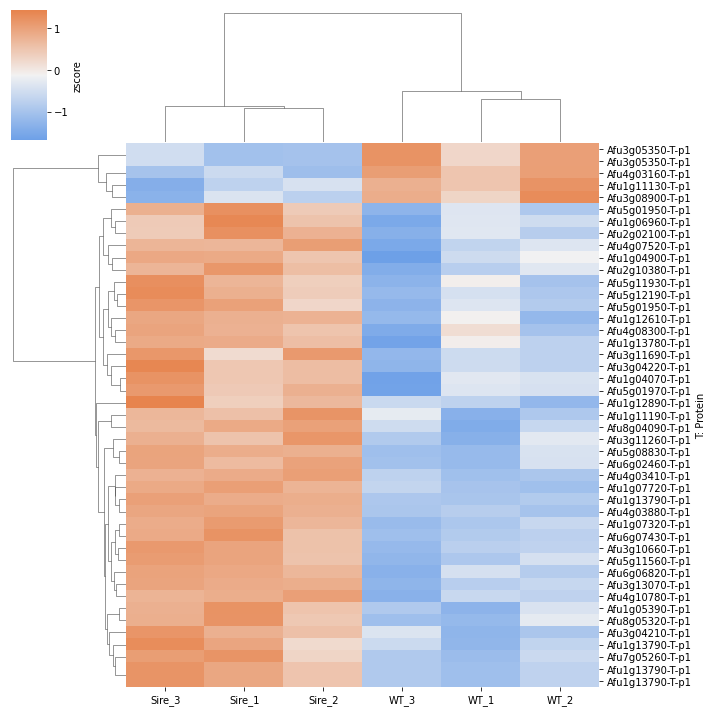

In [ ]:
plt.figure()
plt.suptitle("Heatmap")
plt.figure(figsize=(10,8))

#cmap = sns.diverging_palette(133, 10, center="dark", as_cmap=True) #verde e vermelho
cmap = sns.diverging_palette(250, 30, l=65, as_cmap=True)
#cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
ax = sns.clustermap(zcorekuxsire, cmap=cmap, cbar_kws={'label': 'zscore'}, z_score= 0, yticklabels=True)
plt.plot()

# para evitar o dowload do arquivo, comente as duas linhas abaixo 
#plt.savefig('zscorekacintensityWTxSIRe_total_proteome.png', format='png', dpi=300)
#files.download('zscorekacintensityWTxSIRe_total_proteome.png')